In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv('Group_10_data_cleaned.csv')
data.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [23]:
X = data.drop(["class"], axis = 1)

y = data["class"]

col = X.columns
col

scaler = StandardScaler()

for column in col:
    scaler.fit(X[[column]])
    X[column] = scaler.transform(X[[column]])
X.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,-0.288690,-0.719792,-0.239930,-0.402397,0.176423,-0.750401,-0.056307,-0.277063,-0.381702,-0.601716
1,-0.235945,-0.719792,-0.238487,-0.409987,0.339583,0.562261,-0.037921,-0.273914,-0.374260,-0.607693
2,-0.235945,-0.623899,-0.224875,-0.350282,-0.459335,-0.258153,-0.025904,-0.263680,-0.351404,-0.595738
3,-0.288690,-0.719792,-0.239930,-0.402397,0.013264,-0.246432,-0.027352,-0.277851,-0.380107,-0.619648
4,-0.235945,-0.754662,-0.243436,-0.431713,0.739041,0.931447,-0.057465,-0.281000,-0.384891,-0.613671


In [24]:
data.isna().sum()

height      0
length      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

# Lets perform linear and non linear dimenationality reductional techniques

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [26]:
pca.fit(X)

PCA(n_components=2)

In [27]:
pca_data =  pca.transform(X)

In [28]:
pca_data

array([[-0.88906106, -0.06063061],
       [-1.12795258,  0.70211734],
       [-0.84222911, -0.17185085],
       ...,
       [-0.3354833 , -0.0153382 ],
       [-0.62202443, -0.30595171],
       [-1.55133505,  2.76679415]])

Text(0, 0.5, 'Second component')

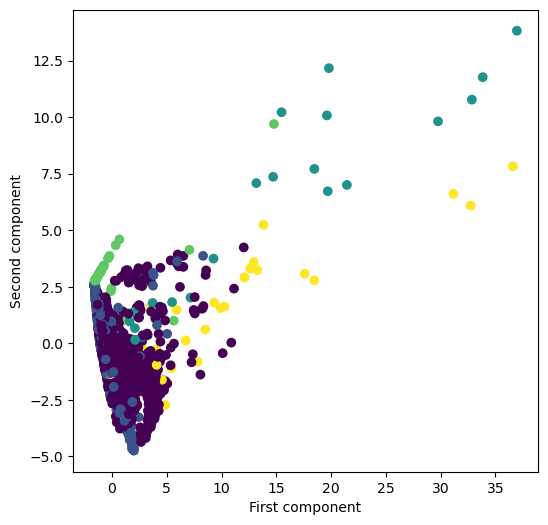

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=y)
plt.xlabel('First component')
plt.ylabel('Second component')

# lets perform visualization using Non linear dimentionality models SOM

In [30]:
from minisom import MiniSom

In [31]:
som = MiniSom( x = 10, y = 10, input_len = 10, sigma = 1.0, learning_rate = 0.5, neighborhood_function='gaussian', random_seed=0)

In [32]:
scaled_data = X.to_numpy()
scaled_data
som.random_weights_init(scaled_data)

In [33]:
scaled_data

array([[-0.28869038, -0.71979187, -0.23993019, ..., -0.27706348,
        -0.38170191, -0.60171582],
       [-0.23594451, -0.71979187, -0.23848657, ..., -0.27391441,
        -0.37426037, -0.60769335],
       [-0.23594451, -0.62389894, -0.22487533, ..., -0.26367994,
        -0.35140423, -0.59573829],
       ...,
       [-0.23594451,  0.04735154, -0.12959666, ..., -0.15346256,
        -0.11805897, -0.01591752],
       [-0.18319864, -0.42339555, -0.18796   , ..., -0.24006193,
        -0.2716735 , -0.36859201],
       [-0.13045278, -0.7720971 , -0.24549842, ..., -0.28178708,
        -0.38967498, -0.63160349]])

In [34]:
som.train_random(data = scaled_data, num_iteration = 100)

In [35]:
scaled_y = y.to_numpy()
scaled_y = list(map(int, scaled_y))

In [36]:
np.unique(scaled_y)

array([1, 2, 3, 4, 5])

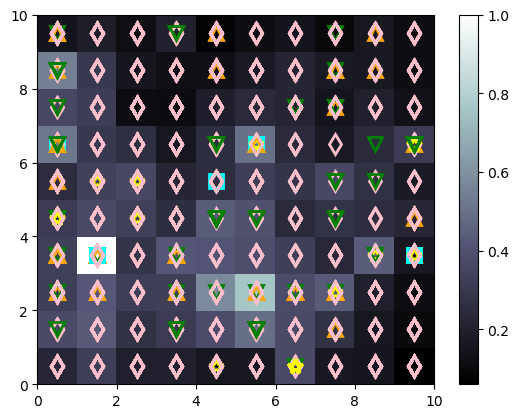

In [37]:
# making a self organization map 
from pylab import bone, pcolor, colorbar, plot, show 
bone() 
pcolor(som.distance_map().T) 
colorbar() 
markers = ["d", "v", "s", "*", "^"] 
colors = ['pink', 'green', 'cyan', 'yellow', 'orange'] 
for i, x in enumerate(scaled_data):
    W = som.winner(x) 
    plot(W[0] + 0.5,
    W[1] + 0.5, markers[scaled_y[i]-1], markeredgecolor = colors [scaled_y[i]-1], markerfacecolor = 'None', markersize = 10,
    markeredgewidth = 2) 
show()

In [38]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [39]:
X = data.drop(["class"], axis = 1)

y = data["class"]

In [40]:
# train and test split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
# check the shapes

In [41]:
def std_scaler(data):
  scaler = StandardScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner
# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [42]:
# hyperparameters
num_rows = 15
num_cols = 15
max_m_dsitance = 5
max_learning_rate = 0.05
max_steps = int(7.5*10e3)

In [43]:
train_x.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
5236,11,357,3927,32.455,0.215,0.823,1.55,845,3232,546
1034,12,58,696,4.833,0.343,0.803,3.85,239,559,62
4472,11,185,2035,16.818,0.487,0.883,4.50,991,1796,220
931,11,89,979,8.091,0.170,0.706,2.72,166,691,61
4998,9,151,1359,16.778,0.185,0.566,1.39,251,769,181


In [44]:
scaler=StandardScaler().fit(train_x) # normalisation

train_x_norm = scaler.transform(train_x)

# initialising self-organising map


In [45]:
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [47]:
train_y.head()

5236    1
1034    1
4472    1
931     1
4998    1
Name: class, dtype: int64

In [54]:
# collecting labels

label_data = train_y.to_numpy()
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
    for col in range(num_cols):
        map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
    if (t+1) % 1000 == 0:
        print("sample data: ", t+1)
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000
sample data:  2000
sample data:  3000
sample data:  4000


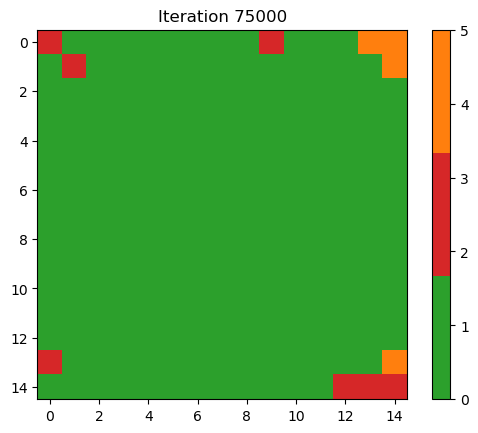

In [55]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
    for col in range(num_cols):
        label_list = map[row][col]
        if len(label_list)==0:
            label = 2
        else:
            label = max(label_list, key=label_list.count)
            label_map[row][col] = label
title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()